# 텍스트 마이닝 03 - 자연어 텍스트 처리 (NLTK) 

<img width="40%" src="https://i.imgur.com/AydcsdT.png">
    
### 2017-2019 [FinanceData.KR]()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

# NLTK

NLTK(Natural Language Toolkit): 자연어 처리 및 문서 분석용 패키지
* 말뭉치
* 토큰 생성
* 형태소 분석
* 품사 태깅

## NLTK 코퍼스 (nltk.corpus 모듈)
http://www.nltk.org/nltk_data/ (전체목록)

주요 코퍼스
* gutenberg : 모비딕(Moby Dick), 성서등 구텐베르크 프로젝트 영문 책 텍스트 18개
* reuters: 10,788 뉴스 문서, 천3백만 단어, 90개 토픽, "training" 과 "test"로 나누어져 있다. 
* brown : 브라운대(1961) 최초 백만단어 코퍼스, 뉴스 학습자료등 카테고리가 나누어져 있다
* names : 8,000개의 남성과 여성의 이름
* words : 가장 빈번하게 사용하는 영어 단어 23,5000개
* stopwords : 14개의 언어의 가장 많이 사용하는 불용어(stop word)
* cmudict : 카네기멜론대, 13,4000개 단어와 그 음절(syllables)로 구성. 동음이의어(homophones) 검색.

In [2]:
import nltk

nltk.download("gutenberg")
nltk.download("reuters")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import nltk
fileids = nltk.corpus.gutenberg.fileids()
print(fileids)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


* corpus.fileids() # 코퍼스에 포함된 파일아이디 목록
* corpus.raw(fileid) # 파일의 원문
* corpus.sents(fileid) #파일의 문장 목록
* corpus.words(fileid) # 파일의 단어 목록

In [4]:
from nltk.corpus import gutenberg

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # 문자수
    num_words = len(gutenberg.words(fileid)) # 단어수
    num_sents = len(gutenberg.sents(fileid)) # 문장수
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) # 어휘수
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [5]:
moby_dick_words = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(moby_dick_words)

260819

# Read documents

In [6]:
import nltk
from nltk.corpus import gutenberg

# 1. read document
moby_dick_text = gutenberg.open('melville-moby_dick.txt').read()
moby_dick_text[:1000]

'[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY.\r\n\r\n(Supplied by a Late Consumptive Usher to a Grammar School)\r\n\r\nThe pale Usher--threadbare in coat, heart, body, and brain; I see him\r\nnow.  He was ever dusting his old lexicons and grammars, with a queer\r\nhandkerchief, mockingly embellished with all the gay flags of all the\r\nknown nations of the world.  He loved to dust his old grammars; it\r\nsomehow mildly reminded him of his mortality.\r\n\r\n"While you take in hand to school others, and to teach them by what\r\nname a whale-fish is to be called in our tongue leaving out, through\r\nignorance, the letter H, which almost alone maketh the signification\r\nof the word, you deliver that which is not true." --HACKLUYT\r\n\r\n"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness\r\nor rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER\'S\r\nDICTIONARY\r\n\r\n"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;\r\nA.S. WALW-IAN, t

# Toknize

텍스트를 처리하기 위한 작은 단위(token)으로 나눈다. NLTK는 다음 토큰 생성을 제공

```python
from nltk.tokenize import sent_tokenize # 문장으로 나누기
from nltk.tokenize import word_tokenize # 단어로 나누기 
from nltk.tokenize import regexp_tokenize # 정규식으로 나누기
```

In [7]:
from nltk.tokenize import sent_tokenize

moby_sents = sent_tokenize(moby_dick_text)
moby_sents[100:110]

['"The mighty whales which swim in a sea of water, and have a sea of\r\noil swimming in them."',
 "--FULLLER'S PROFANE AND HOLY STATE.",
 '"So close behind some promontory lie\r\nThe huge Leviathan to attend their prey,\r\nAnd give no chance, but swallow in the fry,\r\nWhich through their gaping jaws mistake the way."',
 "--DRYDEN'S ANNUS MIRABILIS.",
 '"While the whale is floating at the stern of the ship, they cut off\r\nhis head, and tow it with a boat as near the shore as it will come;\r\nbut it will be aground in twelve or thirteen feet water."',
 "--THOMAS\r\nEDGE'S TEN VOYAGES TO SPITZBERGEN, IN PURCHAS.",
 '"In their way they saw many whales sporting in the ocean, and in\r\nwantonness fuzzing up the water through their pipes and vents, which\r\nnature has placed on their shoulders."',
 "--SIR T. HERBERT'S VOYAGES\r\nINTO ASIA AND AFRICA.",
 'HARRIS COLL.',
 '"Here they saw such huge troops of whales, that they were forced to\r\nproceed with a great deal of caution for fear they

In [8]:
from nltk.tokenize import word_tokenize

moby_words = word_tokenize(moby_dick_text)
moby_words[100:110]

['and', 'to', 'teach', 'them', 'by', 'what', 'name', 'a', 'whale-fish', 'is']

In [9]:
len(moby_words)

254989

In [10]:
from nltk import regexp_tokenize

moby_retoks = regexp_tokenize(moby_dick_text.lower(), r"[\w]+")
moby_retoks[100:110]

['out',
 'through',
 'ignorance',
 'the',
 'letter',
 'h',
 'which',
 'almost',
 'alone',
 'maketh']

# nltk.Text() 

참고 http://www.nltk.org/api/nltk.html#nltk.text.Text

In [0]:
import nltk
moby = nltk.Text(moby_retoks)

In [12]:
print(len(moby.tokens)) # 토큰 개수
print(len(set(moby.tokens))) # 고유한 토큰 개수

218621
17140


## 빈도 분포 FreqDist

In [13]:
freq_dist = moby.vocab() # FreqDist (빈도 분포)
print(len(freq_dist))

17140


In [14]:
print(freq_dist.most_common(50)) # 가장 많이 등장하는 50개

[('the', 14431), ('of', 6609), ('and', 6430), ('a', 4736), ('to', 4625), ('in', 4172), ('that', 3085), ('his', 2530), ('it', 2522), ('i', 2127), ('he', 1896), ('but', 1818), ('s', 1802), ('as', 1741), ('is', 1725), ('with', 1722), ('was', 1644), ('for', 1617), ('all', 1526), ('this', 1394), ('at', 1319), ('whale', 1226), ('by', 1204), ('not', 1151), ('from', 1088), ('him', 1067), ('so', 1065), ('on', 1062), ('be', 1045), ('one', 921), ('you', 894), ('there', 869), ('now', 785), ('had', 779), ('have', 768), ('or', 713), ('were', 684), ('they', 667), ('which', 648), ('like', 647), ('me', 633), ('then', 630), ('their', 620), ('what', 618), ('some', 618), ('when', 606), ('are', 598), ('an', 596), ('my', 589), ('no', 586)]


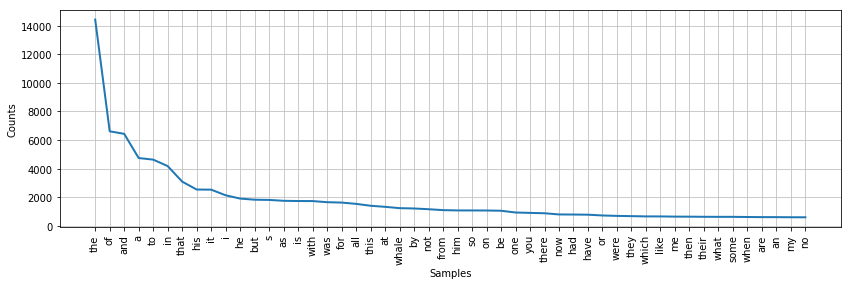

In [15]:
moby.plot(50)

## count

In [16]:
moby.count('captain')

329

## Dispersion plot
단어가 등장하는 위치를 Word Offset에 따라 배치하여 시각화

모비딕의 주요 등장인물들: 'ahab', 'starbuck', 'queequeg', 'ishmael', 'stubb', 'flask', 'fedallah'

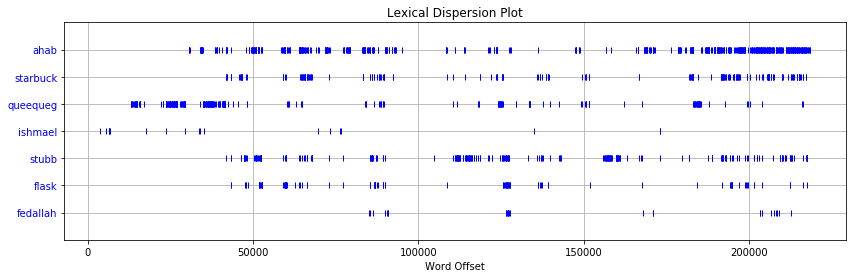

In [17]:
moby.dispersion_plot(['ahab', 'starbuck', 'queequeg', 'ishmael', 'stubb', 'flask', 'fedallah'])

# Concordance

Concordance (색인): 단어가 쓰인 문맥을 모두 찾아준다

In [18]:
moby.concordance('ahab', lines=10)

Displaying 10 of 511 matches:
is eh have ye clapped eye on captain ahab who is captain ahab sir aye aye i th
d eye on captain ahab who is captain ahab sir aye aye i thought so captain aha
hab sir aye aye i thought so captain ahab is the captain of this ship i am mis
past backing out clap eye on captain ahab young man and thou wilt find that he
aptain peleg inquiring where captain ahab was to be found and what dost thou w
d and what dost thou want of captain ahab it s all right enough thou art shipp
e will thee he s a queer man captain ahab so some think but a good one oh thou
a grand ungodly god like man captain ahab doesn t speak much but when he does 
ay well listen mark ye be forewarned ahab s above the common ahab s been in co
e forewarned ahab s above the common ahab s been in colleges as well as mong t


# Similar word

주어진 단어와 비슷한 환경(same context)에서 쓰인(≠비슷한 뜻) 단어들

In [19]:
moby.similar('whale')

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


In [20]:
moby.similar('ship')

whale boat sea world captain way head time other man crew pequod line
deck body fishery air side water voyage


In [21]:
moby.similar('god')

it him that men queequeg them ahab he life man nature time what head
sight heart body i all this


# common_contexts

for two words used in similar contexts

In [22]:
moby.common_contexts(['monstrous', 'true'])

the_pictures


# Collocations
연어(連語, collocation): 함께 위치하는 단어들 (co + location), 어휘의 조합 또는 짝을 이루는 단어

In [23]:
moby.collocations()

sperm whale; moby dick; white whale; old man; mast head; mast heads;
captain ahab; right whale; quarter deck; captain peleg; aye aye; new
bedford; try works; mrs hussey; dough boy; chief mate; cape horn;
cried ahab; years ago; thou art


# PoS Tagging 
NLTK 에서는 Penn Treebank Tagset 을 이용

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

예를 들어, 
* NN: 일반명사 단수
* NNS: 일반명사 복수
* NNP: 대명사 단수
* NNPS: 대명사 복수

In [24]:
# 간단한 예제

nltk.pos_tag(['The', 'earth', 'is', 'a', 'beautiful', 'planet'])

[('The', 'DT'),
 ('earth', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('planet', 'NN')]

* DT: 한정사
* NN: 명사, 단수형
* VBZ: 동사, 현재형 시제, 3인칭 단수
* JJ: 형용사

In [25]:
# 허먼 멜빌, "모비딕" 첫 단락
# 나를 이스마엘로 불러라. 몇 년 전, 정확히 얼마나 오래 동안 그랬는지는 모르겠지만, 
# 내 지갑에 돈 한 푼 없는 빈털터리 신세에 육상에선 특별히 흥미를 끄는 어떤 것도 없던 그런 시절, 
# 나는 잠시 동안이나마 배를 타고 세계의 바다를 보고 싶다는 생각을 했다. 
# 그것이 우울하고 의기소침한 감정, 그 반복되는 악순환의 고리를 끊어버리는 한 방법이었다.

moby_dick_first_para_text = '''
Call me Ishmael.  Some years ago -- never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of the world. 
It is a way I have of driving off the spleen, and regulating the circulation. 
'''

import nltk
from nltk.tokenize import word_tokenize

moby_words = word_tokenize(moby_dick_first_para_text)
tasg = nltk.pos_tag(moby_words)
tasg[:20]

[('Call', 'VB'),
 ('me', 'PRP'),
 ('Ishmael', 'NNP'),
 ('.', '.'),
 ('Some', 'DT'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('--', ':'),
 ('never', 'RB'),
 ('mind', 'VB'),
 ('how', 'WRB'),
 ('long', 'JJ'),
 ('precisely', 'RB'),
 ('--', ':'),
 ('having', 'VBG'),
 ('little', 'JJ'),
 ('or', 'CC'),
 ('no', 'DT'),
 ('money', 'NN'),
 ('in', 'IN')]

# Noun phrase chunking


```python
# Colab 에서는 출력되지 않습니다.

text = 'The earth is a beautiful planet.'

tokens = text.split()
tags = nltk.pos_tag(tokens)
parser = nltk.RegexpParser("NP: {<DT>?<JJ>?<NN.*>*}")
tree = parser.parse(tags)
tree
```

<img src="https://i.imgur.com/zhwGPri.png">


# Stemming, lemmatization 
Stemming (어간 추출), Stemming (원형 추출)

NLTK 지원
* Stemmer: Porter(보수적), Lancaster(적극적)
* Lemmatizer: WordNetLemmatizer (WordNet 이 계산한 형태소를 참조, 인터넷 연결 필요)

Stemmer vs Lemmatizer
* stemming은 단어만 본다 (결과 stem이 사전에 없을 수도 있다)
* Lemmatizer는 더 느리고 더 보수적

In [27]:
p_stmr = nltk.PorterStemmer()
p_stmr.stem("wonderful"), p_stmr.stem("flying"), p_stmr.stem("flies")

('wonder', 'fli', 'fli')

In [28]:
l_stmr = nltk.LancasterStemmer()
l_stmr.stem("wonderful"), l_stmr.stem("flying"), l_stmr.stem("flies")

('wond', 'fly', 'fli')

In [29]:
lmtz = nltk.WordNetLemmatizer()
lmtz.lemmatize("wonderful"), lmtz.lemmatize("flying"), lmtz.lemmatize("flies")

('wonderful', 'flying', 'fly')

In [30]:
# POS: # n=명사, v=동사, a=형용사, r=부사
print(lmtz.lemmatize("cats"))
print(lmtz.lemmatize("better", pos="a")) 
print(lmtz.lemmatize("is", pos="v"))
print(lmtz.lemmatize("led"))
print(lmtz.lemmatize("led",'v'))

cat
good
be
led
lead


# Summary
* NLTK 개요
* NLTK 코퍼스
* Concordance (색인)
* Similar Word: Similar context 단어들 (≠비슷한 뜻)
* common_contexts 
* Collocations (연어)
* PoS Tagging
* chunking
* Stemming (어간 추출), Stemming (원형 추출)

### 2017-2019 [FinanceData.KR]()